In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('FineTech_appData.csv',parse_dates=['first_open','enrolled_date'])
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  object        
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 4.6+ MB


/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


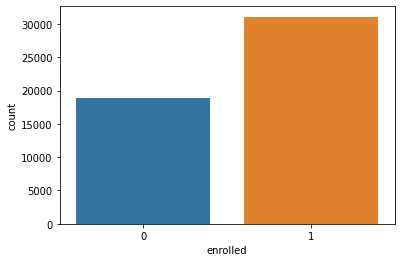

In [4]:
sns.countplot('enrolled',data=df)
plt.show()

The number of user that were enrolled is much more than user that weren't enrolled

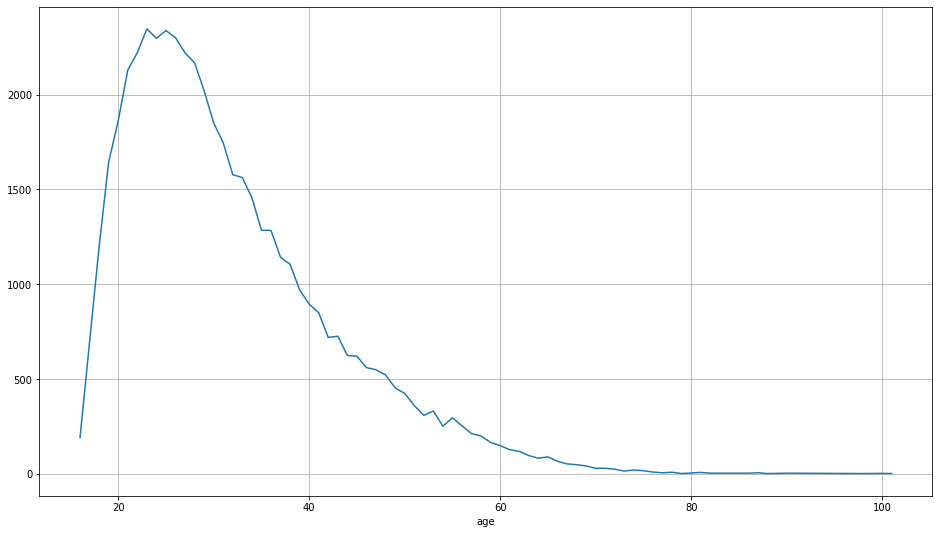

In [5]:
df.groupby('age').count()['user'].plot(figsize=(16,9))
plt.grid()

we see most of the user are young and aged between 15 and 35 years

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

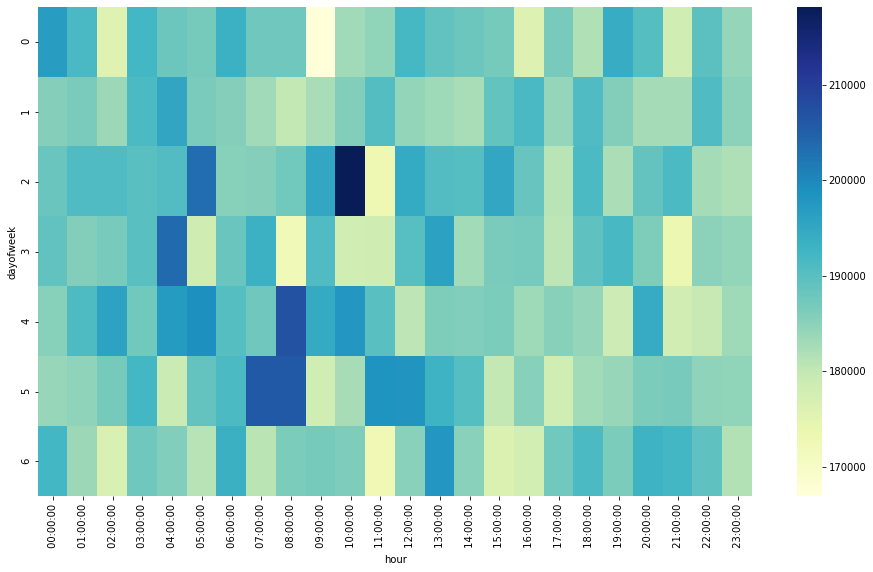

In [6]:
plt.figure(figsize=(16,9))
pv = df.pivot_table(index='dayofweek', columns = 'hour', values='user')
sns.heatmap(pv,cmap='YlGnBu')

from the heatmap, we can see that on Tuesday around 10am user opened the app for the first time most.

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minigame', ylabel='count'>

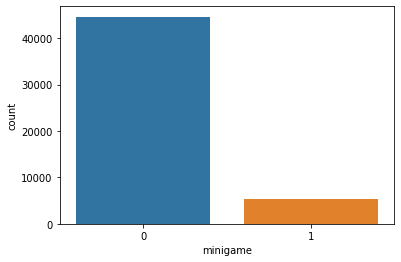

In [7]:
sns.countplot('minigame',data=df)

most of the user didn't played them minigame in the app

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='used_premium_feature', ylabel='count'>

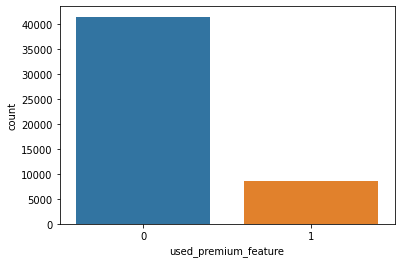

In [8]:
sns.countplot('used_premium_feature',data=df)

we can see, most of the user didn't have to use premium feature. most of them use the app just for basic features

In [9]:
enroll = df[df['enrolled']==1]
enroll_not = df[df['enrolled']==0]

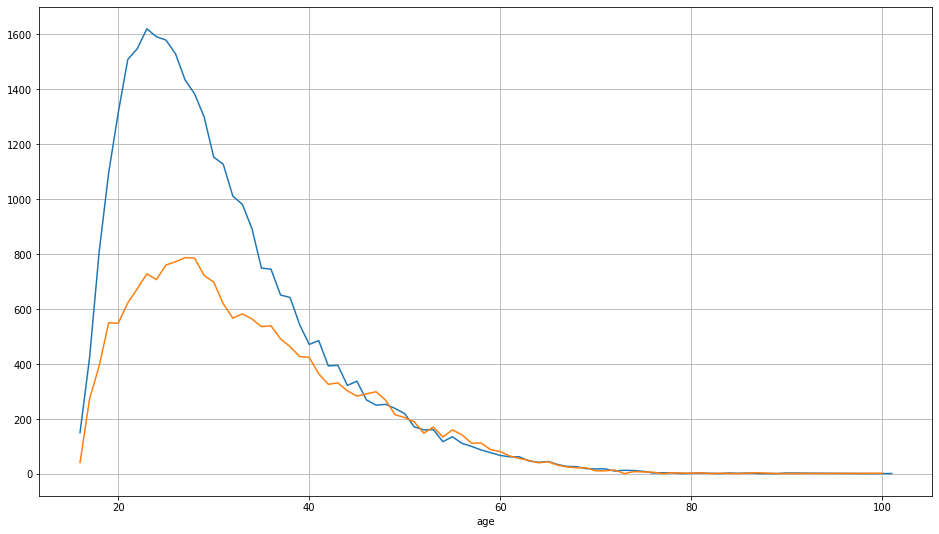

In [10]:
plt.figure(figsize=(16,9))
enroll.groupby('age').count()['user'].plot()
enroll_not.groupby('age').count()['user'].plot()
plt.grid()


/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'not enrolled user'}, xlabel='used_premium_feature', ylabel='count'>

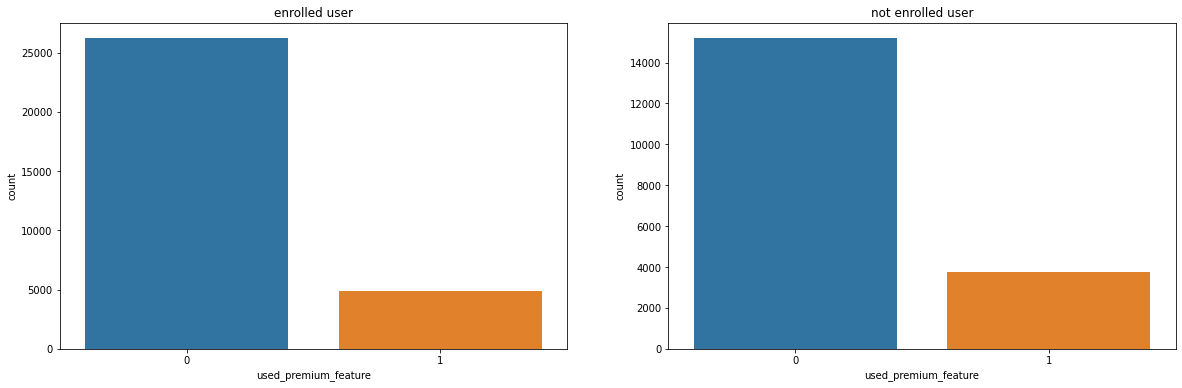

In [11]:

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('enrolled user')
sns.countplot('used_premium_feature',data=enroll)
plt.subplot(1,2,2)
plt.title('not enrolled user')
sns.countplot('used_premium_feature',data=enroll_not)

most of the user didn't use premium feature in case of both 'enrolled user' and 'not enrolled user'
but if we think about the ratio of 'not used and used premium feature' in both cases, we see ratio is high in not enrolled user. 

In [12]:
feature=[]
for i in df.screen_list:
    ft = i.split(',')
    for j in ft:
        if j.strip() not in feature:
            feature.append(j.strip())

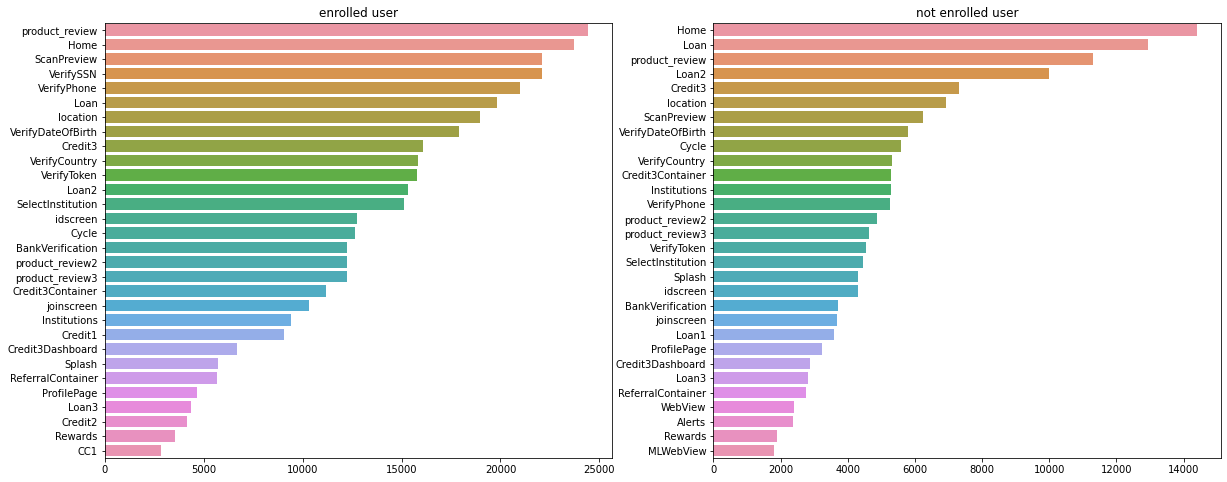

In [13]:
def ft_p(frame,name):
    feature_count = {}
    for i in feature:
        count = 0
        for j in frame.screen_list:
            if i.strip() in j:
                count = count + 1
        feature_count[i] = count
    feature_count = sorted(feature_count.items(),key=lambda x: x[1],reverse = True)
    feature_count=dict(feature_count)
    features= list(feature_count.keys())
    counts = list(feature_count.values())
    
    plt.title(name)
    sns.barplot(y=features[:30],x=counts[:30])
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ft_p(enroll, 'enrolled user')
plt.subplot(1,2,2)
ft_p(enroll_not,'not enrolled user')

from above we can see whice features were used most by the users

<AxesSubplot:>

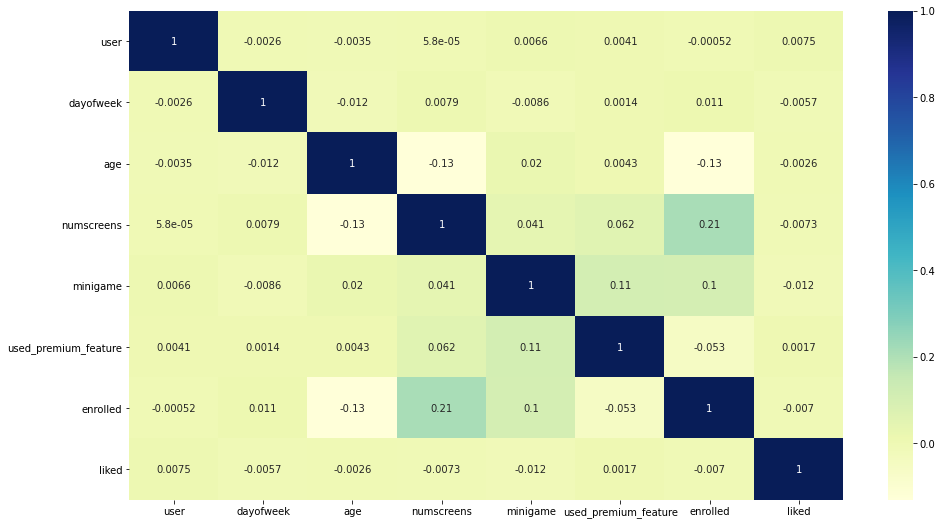

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

there are no noticable correlations between these features. although 'enrolled' and 'numscreens' are slighly positively related which means if the values of numscreens increases, user tends to be an enrolled user

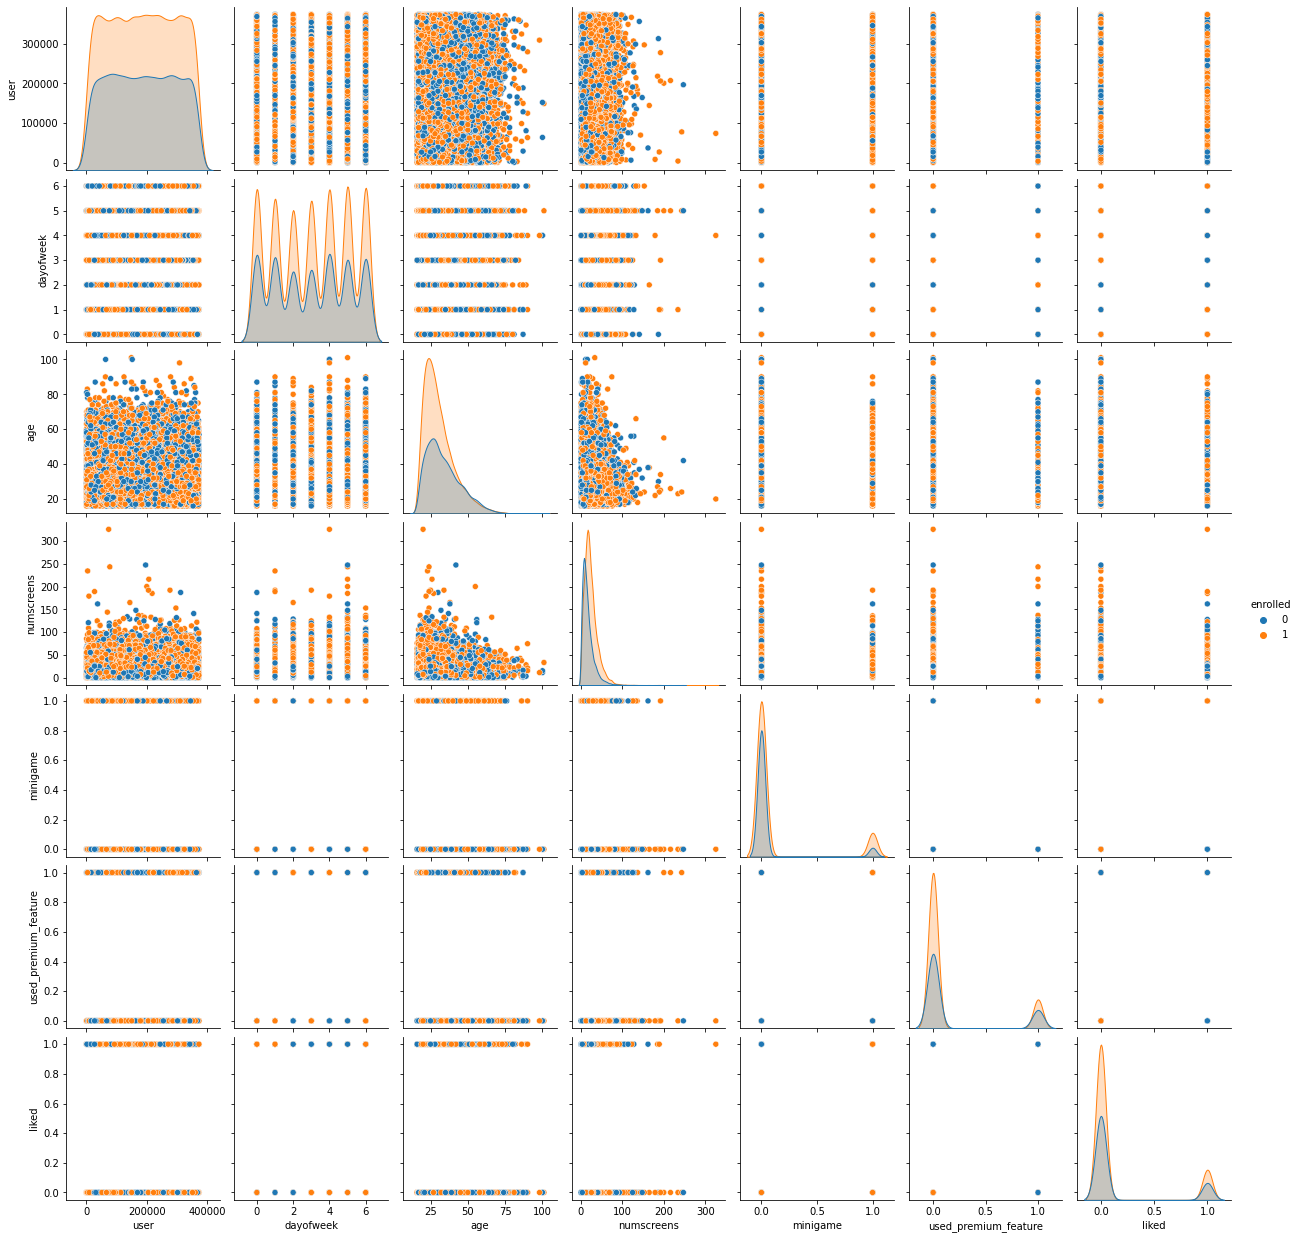

In [15]:
sns.pairplot(df,hue='enrolled')

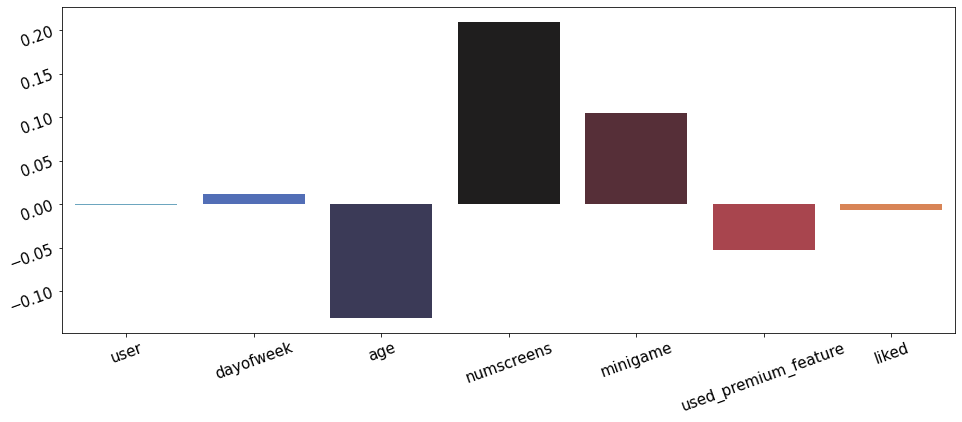

In [16]:
plt.figure(figsize=(16,6))
df1 = df.drop(['first_open','screen_list','enrolled_date','hour','enrolled'],axis=1)
ax =sns.barplot(x=df1.columns,y= list(df1.corrwith(df.enrolled)),palette='icefire')
ax.tick_params(labelsize=15,labelrotation = 20,color = 'k')

we see, numscreens is positively related with enrolled which we've seen in the previous chart. we also see that 'age' is negatively related with 'enrolled' which means if age increases, number of enrolled users decreases.

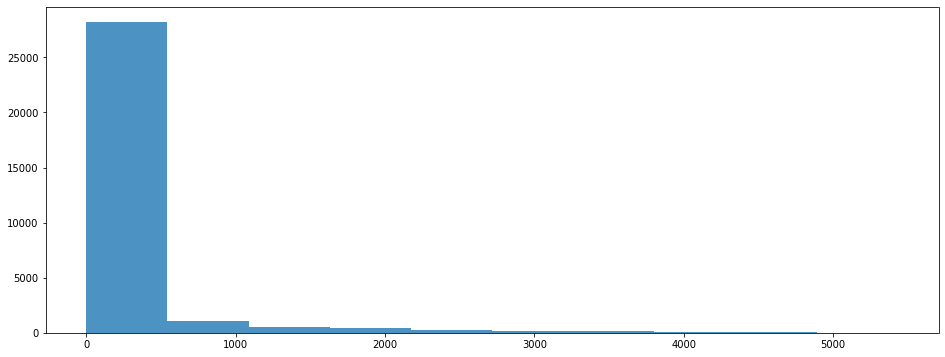

In [17]:
#we will create a new column 'time_needed' which will showing how much time an user took to enroll
df['time_needed'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')
plt.figure(figsize=(16,6))
plt.hist(df.time_needed.dropna(),alpha=.8)
plt.show()

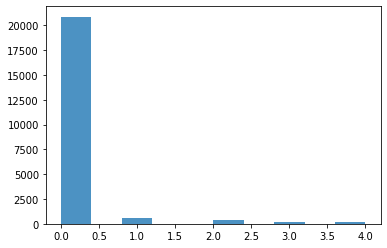

In [18]:
#we will analyse more. we will create a dataframe of users who took less than 5hours 
df4 = df[df['time_needed'] < 5]
plt.hist(df4.time_needed.dropna(),alpha=.8)
plt.show()

we can see, most of the users enrolled within .5 hours after they installed the apps

In [19]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_needed
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


# builing machine learning model

In [20]:
#we'll drop unneccessary columns
df2 = df.drop(['user','first_open','enrolled_date'],axis=1)

In [21]:
df2.head()

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,time_needed
0,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,1,NaN
3,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0,0.0
4,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1,0.0


In [22]:
len(feature)

137

In [23]:
feature_count = {}
for i in feature:
    count = 0
    for j in df2.screen_list:
        if i.strip() in j:
            count = count + 1
    feature_count[i] = count
feature_count = sorted(feature_count.items(),key=lambda x: x[1],reverse = True)
feature_count=dict(feature_count)

In [24]:
#we will create a function that will create a column for every features and will give value '1' if user used the feature otherwise the value will be '0'
def screen_used(x):
    if i+',' in x:
        return 1
    else:
        return 0
for i in feature:
    df2[i] = df['screen_list'].apply(screen_used)

In [25]:
#now we will drop 'screen_list' since it has no use to our machine learning model
df2.drop(['screen_list'],axis=1,inplace=True)

In [26]:
df2.time_needed.isnull().sum()

18926

In [27]:
#we can see, there are a lot of null values so we can't drop columns with null values. so we will fill the null values with the mean values of the previous columns and next columns
df2['time_needed'].interpolate(inplace=True)

In [28]:
#our 'hour' column type is object. and we can't use any types of data but integar and float. so we'll apply 'apply' function to transform object into integar
df2['hour'] = df2['hour'].apply(lambda x: int(x.strip().split(':')[0]))

In [29]:
df2.dropna(inplace=True)
df3 = df2.drop(['enrolled'],axis=1)
Y = df2['enrolled']

In [30]:
#we'll use train_test_split to split dataset into two sets. training set and testing set. we'll use training set to train our model and testing set to test our model to see how our model performancing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df3,Y)

In [31]:
#we'll use standard scaler to scale our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

we have to try some of the model to check which is performing better with this dataset

In [32]:
#using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dct.score(x_test,y_test)

0.81056

In [34]:
#using Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.4732120860292195

In [35]:
#using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.85448

In [ ]:
#using Support Vector Classifier
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

In [ ]:
#using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
knc.score(x_test,y_test)

In [ ]:
#using naive_bayes
from sklearn.naive_bayes import GaussianNB
gss = GaussianNB()
gss.fit(x_train,y_train)
gss.score(x_test,y_test)

In [ ]:
#using LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
log.score(x_test,y_test)

we can see, in this particular dataset RandomForestClassifier is giving the best score (.85), so we'll be using RandomForestClassifier to make the final model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = rf.predict(x_test)
y_pred_con = confusion_matrix(y_test,y_pred)
sns.heatmap(y_pred_con, annot=True,fmt='g')

In [ ]:
y_pred_class = classification_report(y_test,y_pred)
y_pred_class

In [ ]:
#using cross validation to check if our model is overfitted or underfitted
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator= rf, X= x_train,y=y_train,cv=10)
print(cross_val)
print(cross_val.mean())

we can see, our model is giving score of .85 on average. so it isn't overfitting, we're good to go with RandomForestClassifier

In [ ]:
#using pickle to save and load the model
import pickle
pickle.dump(rf, open('fintec_model.pickle','wb'))
final_model = pickle.load(open('fintec_model.pickle','rb'))

In [ ]:
final_model.score(x_test,y_test)

In [ ]:
final_model.predict(x_test)